In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('레드불.json') as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.DataFrame(json_data['data'])

In [4]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[안녕하세요! 제가 레드불 COL 경희대학교 서포터즈 대표로 활동하게 되었습니다!💜...,"[레드불, 레드불코리아, redbullcol, redbullkorea, 에너지드링크...",[],2020년 8월 24일,[303]
1,1,[평소에도 피곤할때 커피보단 레드불 한캔...,"[와이드앵글, 마소라프로, 스릭슨, 광고, 레...",[],2020년 9월 26일,"[1,695]"
2,2,[3시간 잤지만 레드불 마시면 월미도 뿌수ᄀ...,"[레드불, 레드불코리아, 레드불날개를달아ᄌ...",[월미테마파크],2020년 10월 20일,[135]
3,3,[#서울스탬프러닝챌린지\n⠀\n지난주 사진ᄋ...,"[서울스탬프러닝챌린지, 언더아머, 맵마이...",[],2020년 10월 17일,"[1,030]"
4,4,[화질구지여서 재업로두 호호 ^^..\n시험기간...,"[셀카, 셀피, 셀스타그램, 좋반, 좋아요반사, 좋아요, instalike, 건대,...",[건대입구역],2020년 10월 10일,[662]
...,...,...,...,...,...,...
9995,9995,[하..이제야 정신이 드네요🙄\n\n2016.12.25-2019.03.15 Redb...,"[redbull, redbullkr, movie, album, 레드불, 레드불코리아...",[Red Bull],2019년 3월 18일,[]
9996,9996,[#무주사랑♡#하이원시즌마지막원정기\n#비시즌대구번개 후 달려간#H-1\n#도둑스킹...,"[무주사랑, 하이원시즌마지막원정기, 비시즌대구번개, H, 도둑스킹, 하세코, 파우더...",[],2019년 3월 18일,[44]
9997,9997,[#하이원#H-1#아웃백다니는미미\n#슬롭데이트 중 찰칵~^^\n이제는 보내주렵니다...,"[하이원, H, 아웃백다니는미미, 슬롭데이트, 18, 이제올시즌마지막, 도둑스킹, ...",[],2019년 3월 18일,[32]
9998,9998,[간지폭발 미르메\n태극당 - 서울의봄 1일차\n.\n.\n.\n.\n.\n#미르메...,"[미르메, 미르메태권도, 태권도시범단, 익스트림태권도, 옆차기, 고려품새, 태극당,...",[],2019년 3월 17일,[39]


# Hashtags 분석

# 1. Word Cloud

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [85]:
tags = [element for array in list(df.Hashtags) for element in array]

In [86]:
tags[0:5]

['레드불', '레드불코리아', 'redbullcol', 'redbullkorea', '에너지드링크']

In [87]:
rb_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500','레드불','레드불400','레드불']

In [88]:
cv = CountVectorizer(max_features=10000, stop_words = rb_stop_words)

In [89]:
tdm = cv.fit_transform(tags)

In [90]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [91]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
8172,일상,773
7697,운동,602
4401,데일리,571
4702,러닝,537
6413,소통,489
7725,운동하는남자,402
8386,전자담배,392
7237,언더아머,392
900,gopro,374
3517,고프로,368


In [92]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [93]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

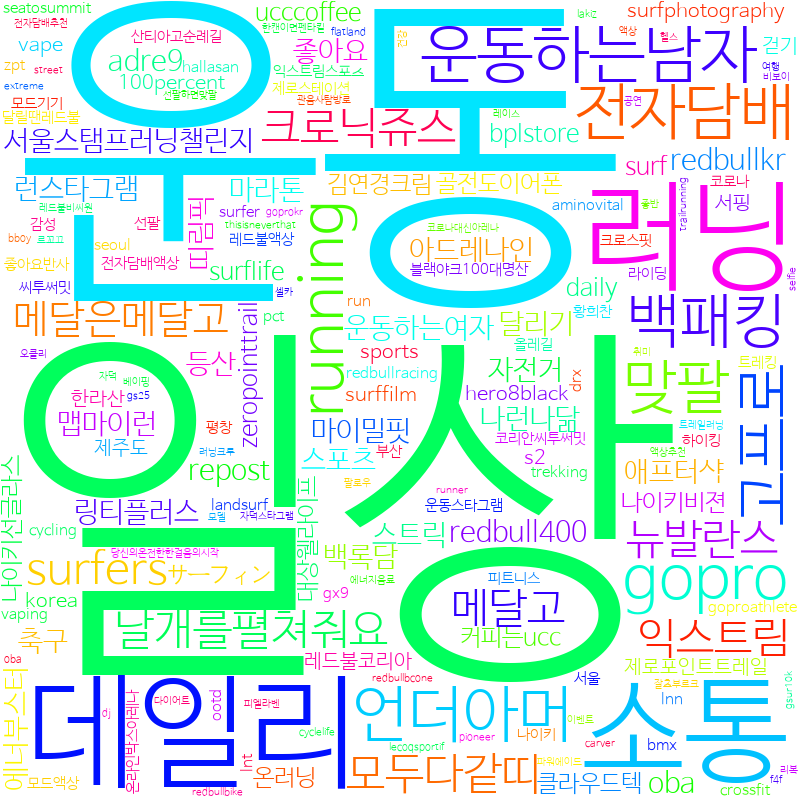

In [94]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [95]:
tdm.shape

(164110, 10000)

In [96]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [97]:
words = cv.get_feature_names()

In [98]:
tokens = tags

In [99]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1min 29s


In [100]:
from sklearn.decomposition import TruncatedSVD

In [101]:
svd = TruncatedSVD(n_components=1000)

In [102]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [103]:
svd.components_.shape

(1000, 10000)

In [104]:
word_emb = svd.components_.T

In [105]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 8172
운동 7697
데일리 4401
러닝 4702
소통 6413
운동하는남자 7725
전자담배 8386
언더아머 7237
gopro 900
고프로 3517
running 1688
백패킹 5588
맞팔 5096
날개를펼쳐줘요 3982
surfers 1937
모두다같띠 5246
크로닉쥬스 9121
익스트림 8065
뉴발란스 4119
메달고 5193
서울스탬프러닝챌린지 6195
메달은메달고 5195
운동하는여자 7729
맵마이런 5162
달리기 4206
나런나닮 3930
스트릭 6689
좋아요 8548
스포츠 6723
링티플러스 4989
repost 1640
띠림픽 4636
등산 4572
자전거 8252
redbull400 1561
마라톤 4995
redbullkr 1607
서핑 2740
아드레나인 6945
애프터샥 7121
런스타그램 4743
oba 1377
백록담 5580
adre9 155
축구 8851
마이밀핏 5022
에너부스터 7268
골전도이어폰 3548
커피는ucc 9016
온러닝 7590
ucccoffee 2097
김연경크림 3879
날개를펼쳐줘요 2482
zeropointtrail 2343
나이키비젼 3955
나이키선글라스 3956
대상웰라이프 4280
클라우드텍 9171
surf 1931
아웃도어 2793
daily 547
서핑수트 2744
랜드서핑 2561
bplstore 335
サーフィン 3122
surflife 1943
surfphotography 1944
서핑사진 2743
유인터네셔널 2861
서프보드 2737
korea 1161
100percent 8
서핑 6246
스무스스타 2769
s2 1704
레드불코리아 4853
딜런서프보드 2550
제주도 8475
hero8black 986
vape 2152
서프트레이너 2738
걷기 3391
제로포인트트레일 8459
한라산 9702
sports 1850
surffilm 

In [106]:
word_emb = svd.components_.T

In [107]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [108]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 7min 21s


360

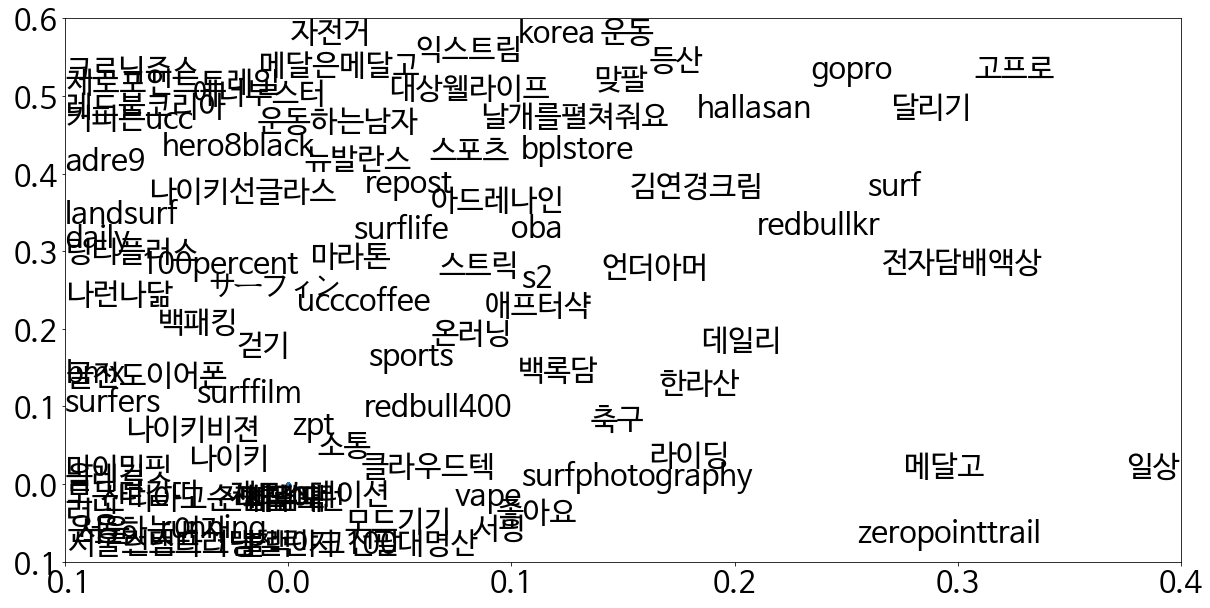

In [109]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.4)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [110]:
from sklearn.manifold import TSNE

In [111]:
tsne = TSNE()

In [112]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 18min 14s


57

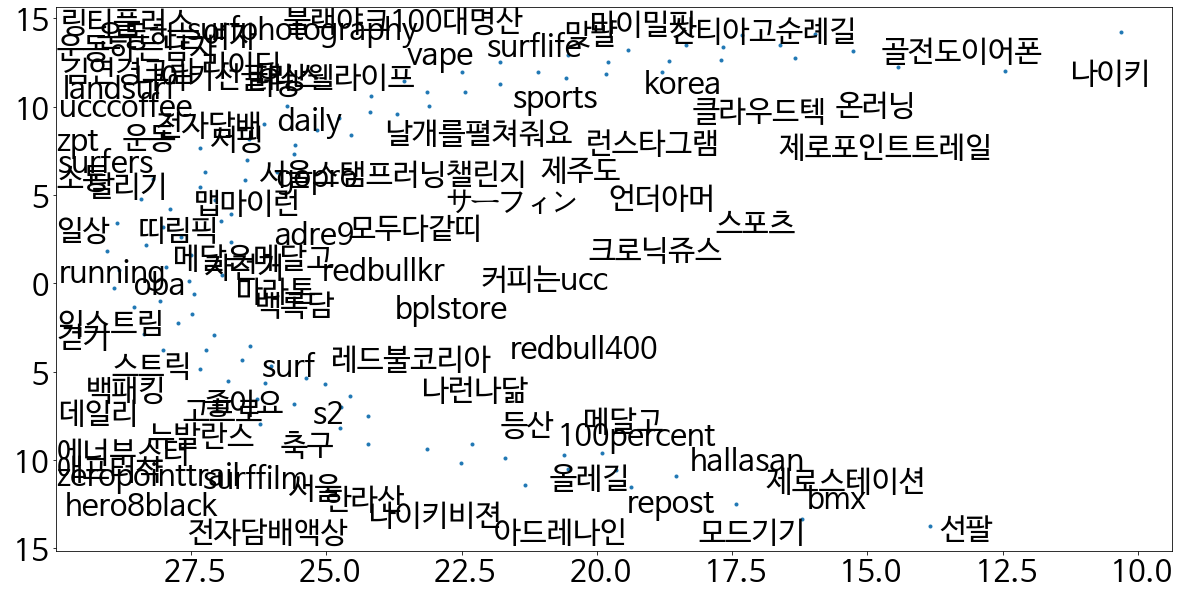

In [113]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [114]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [115]:
sentences = list(df['Hashtags'])

In [116]:
model = Word2Vec(sentences, size = 1000, min_count = 200, workers = 4, window = 100) # negative, sg

In [117]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [118]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [121]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 10)

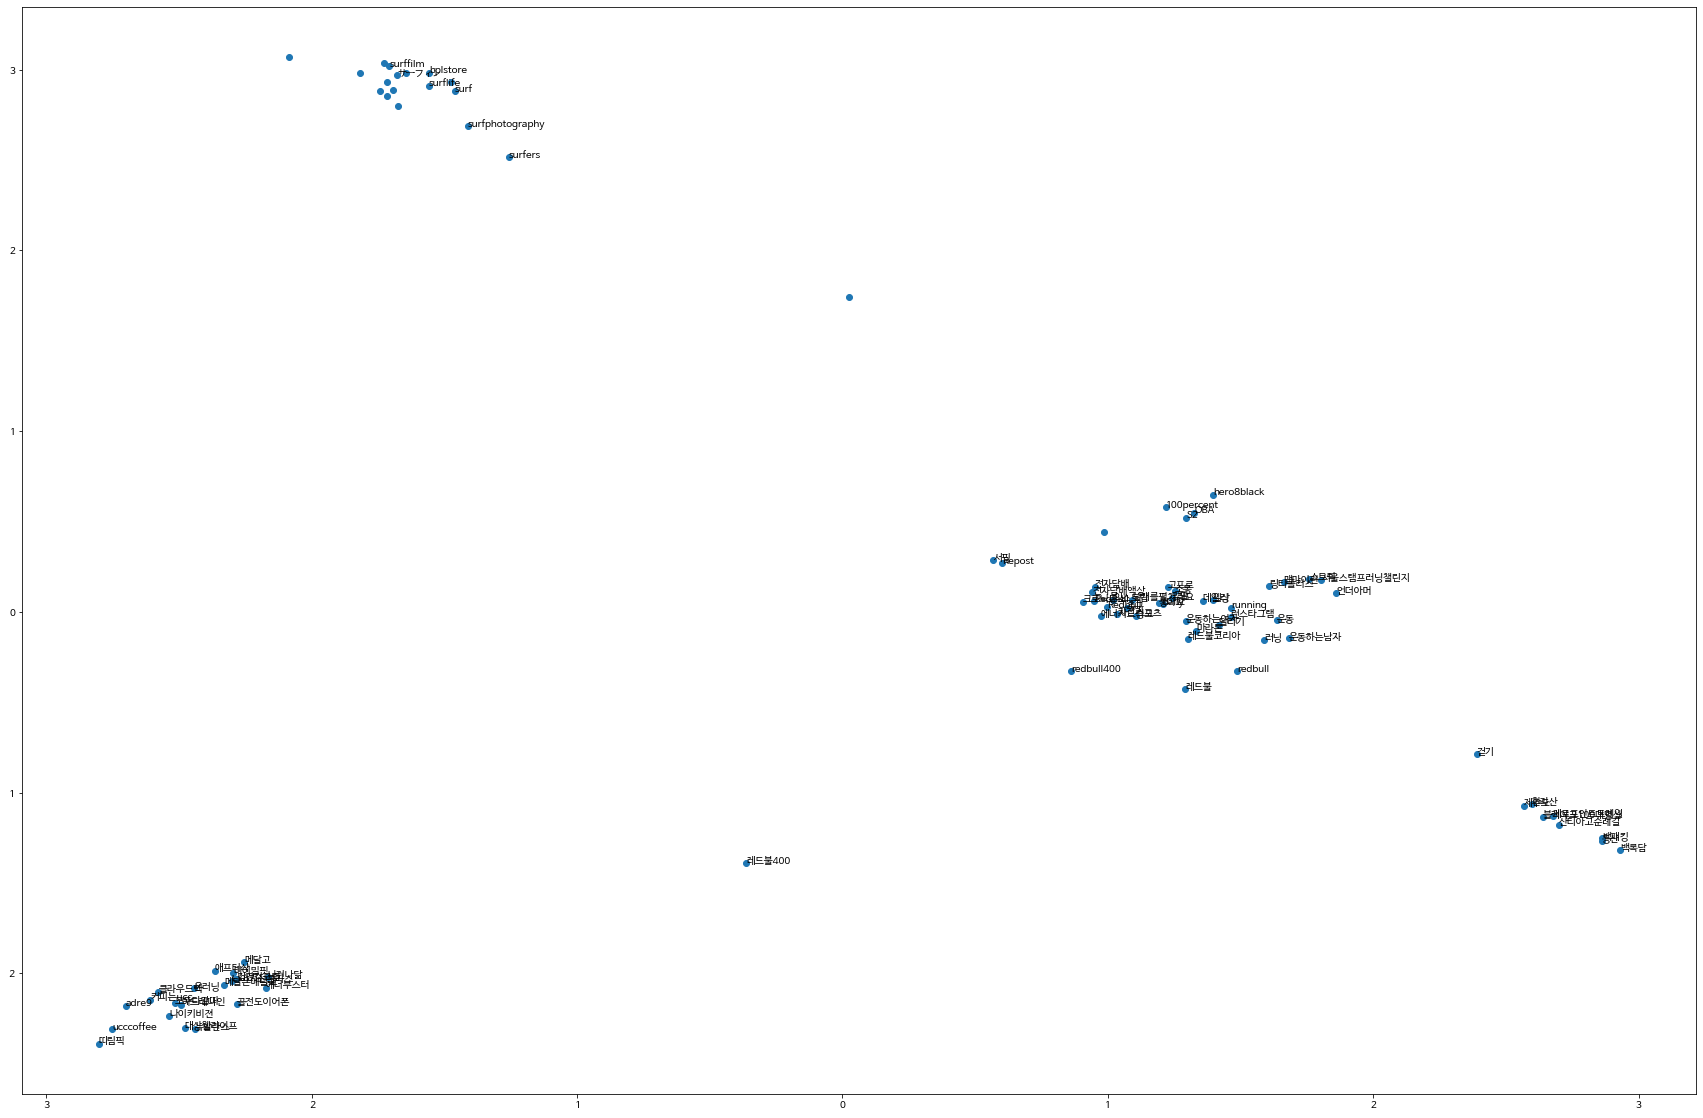

In [122]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [58]:
locates = [element for array in list(df.Locates) for element in array]

In [59]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [60]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
736,seoul,343
454,jeju,158
248,do,136
2110,한라산,136
95,beach,133


In [61]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [62]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

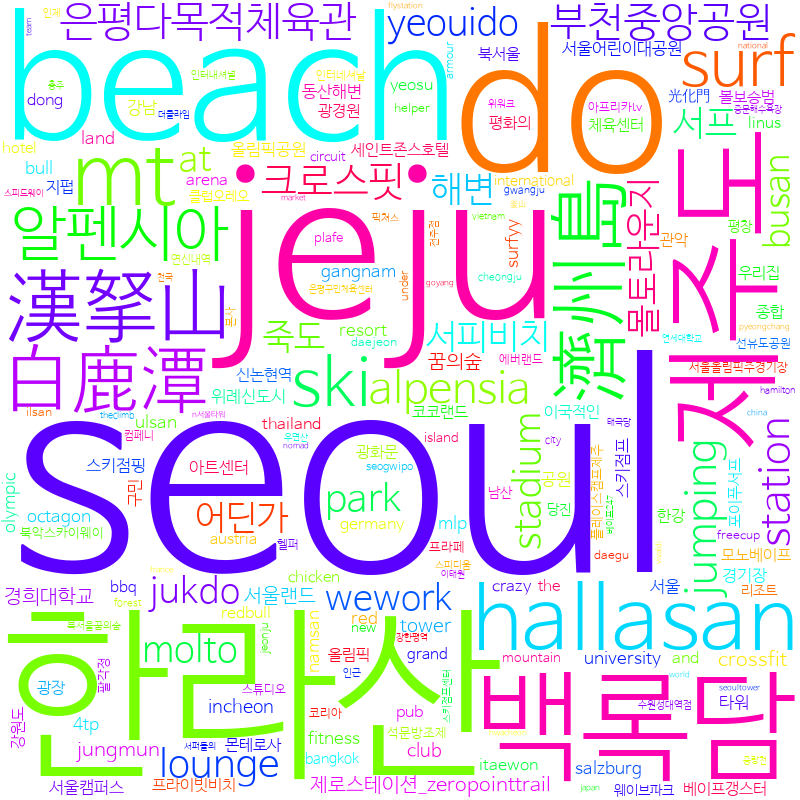

In [63]:
cloud.to_image()

## - Embedding

- LSA

In [64]:
tdm.shape

(4116, 2180)

In [65]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [66]:
words = cv.get_feature_names()
tokens = locates

In [67]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 364 ms


In [68]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 6.62 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [69]:
svd.components_.shape

(1000, 2180)

In [70]:
word_emb = svd.components_.T

In [71]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 736
jeju 454
do 248
한라산 2110
beach 95
백록담 1361
제주도 1887
hallasan 363
濟州島 966
mt 584
白鹿潭 967
漢拏山 964
ski 758
surf 795
알펜시아 1648
alpensia 42
은평다목적체육관 1795
jumping 468
부천중앙공원 1402
station 785
크로스핏 1988
lounge 530
stadium 779
park 645
해변 2127
yeouido 907
molto 574
몰토라운지 1313
서프 1510
죽도 1903
어딘가 1665
jukdo 467
wework 884
서피비치 1513
at 69
busan 129
제로스테이션_zeropointtrail 1883
crossfit 215
꿈의숲 1116
jungmun 469
서울랜드 1485
경희대학교 1030
tower 830
club 189
incheon 424
fitness 295
서울캠퍼스 1497
동산해변 1222
surfyy 799
4tp 17
올림픽공원 1740
mlp 572
octagon 628
university 848
red 687
서울어린이대공원 1492
salzburg 715
타워 2009
경기장 1018
bull 126
스키점프 1576
resort 693
olympic 633
위례신도시 1784
공원 1046
gangnam 315
서울 1477
스키점핑 1579
ulsan 842
강남 990
아트센터 1631
namsan 602
land 508
세인트존스호텔 1538
북서울 1403
광화문 1067
itaewon 440
redbull 688
신논현역 1599
arena 64
몬테로사 1312
볼보승범 1392
강원도 1003
光化門 943
pub 676
한강 2095
모노베이프 1306
thailand 817
이국적인 1802
포이푸서프 2063
프라이빗비치 2068
코코랜드 1984
yeosu 906
체육센터 1936
종합 1899
dong 250
and 51
우리집 1757
ger

In [72]:
word_emb = svd.components_.T

In [73]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 3min 33s


402

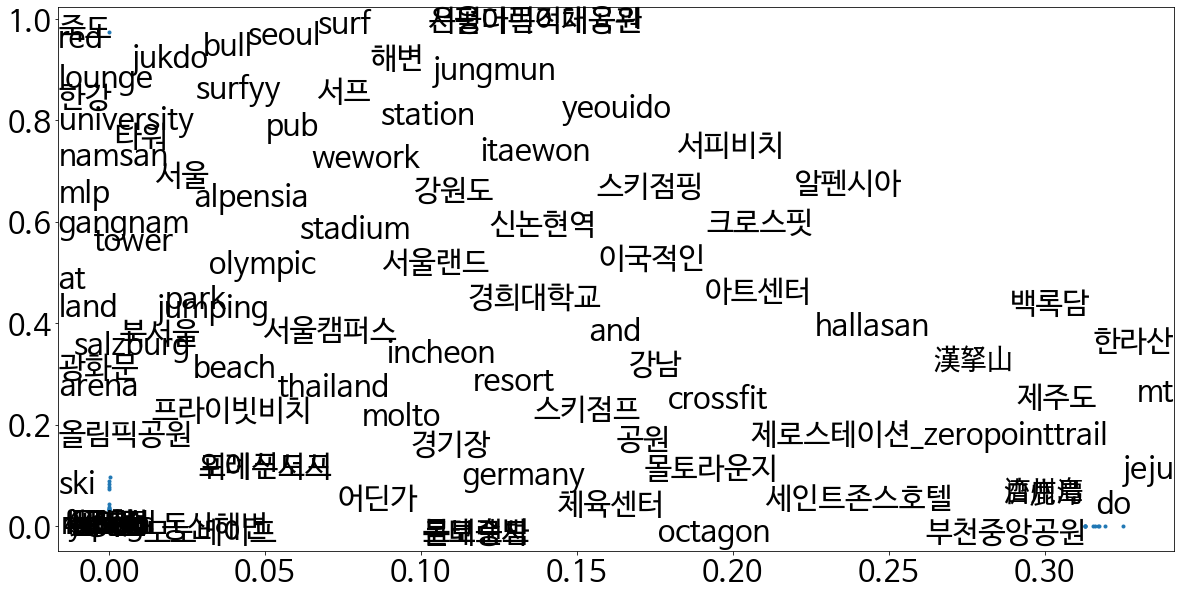

In [74]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [75]:
tsne = TSNE()

In [76]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 55.1 s


311

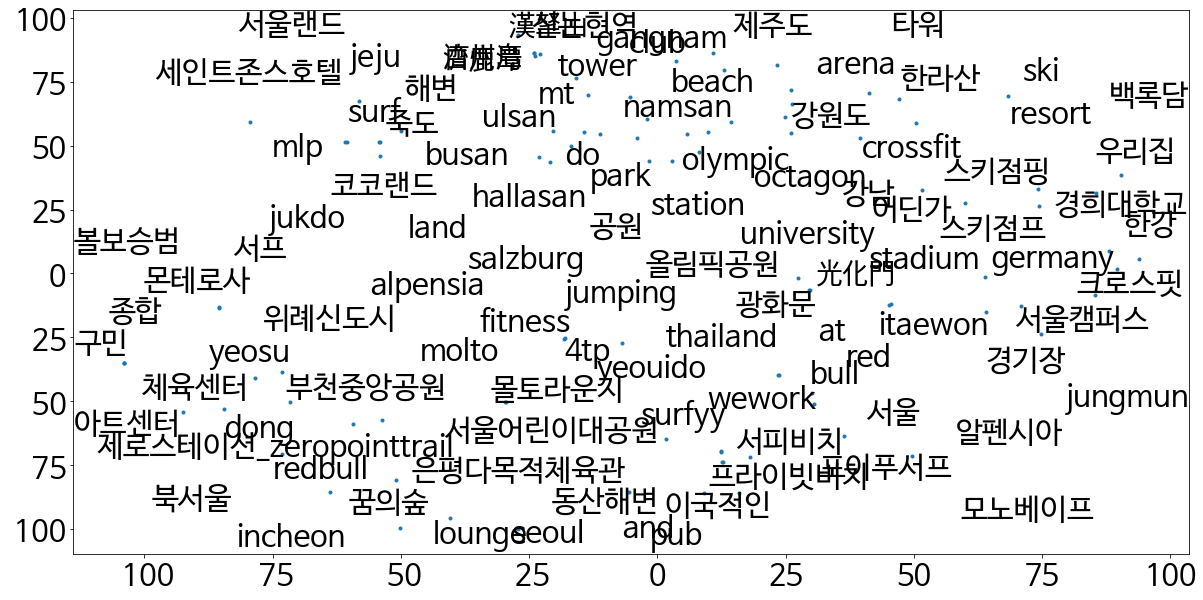

In [77]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [78]:
sentences = list(df['Locates'])

In [79]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [80]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [81]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 7.98 ms


In [82]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

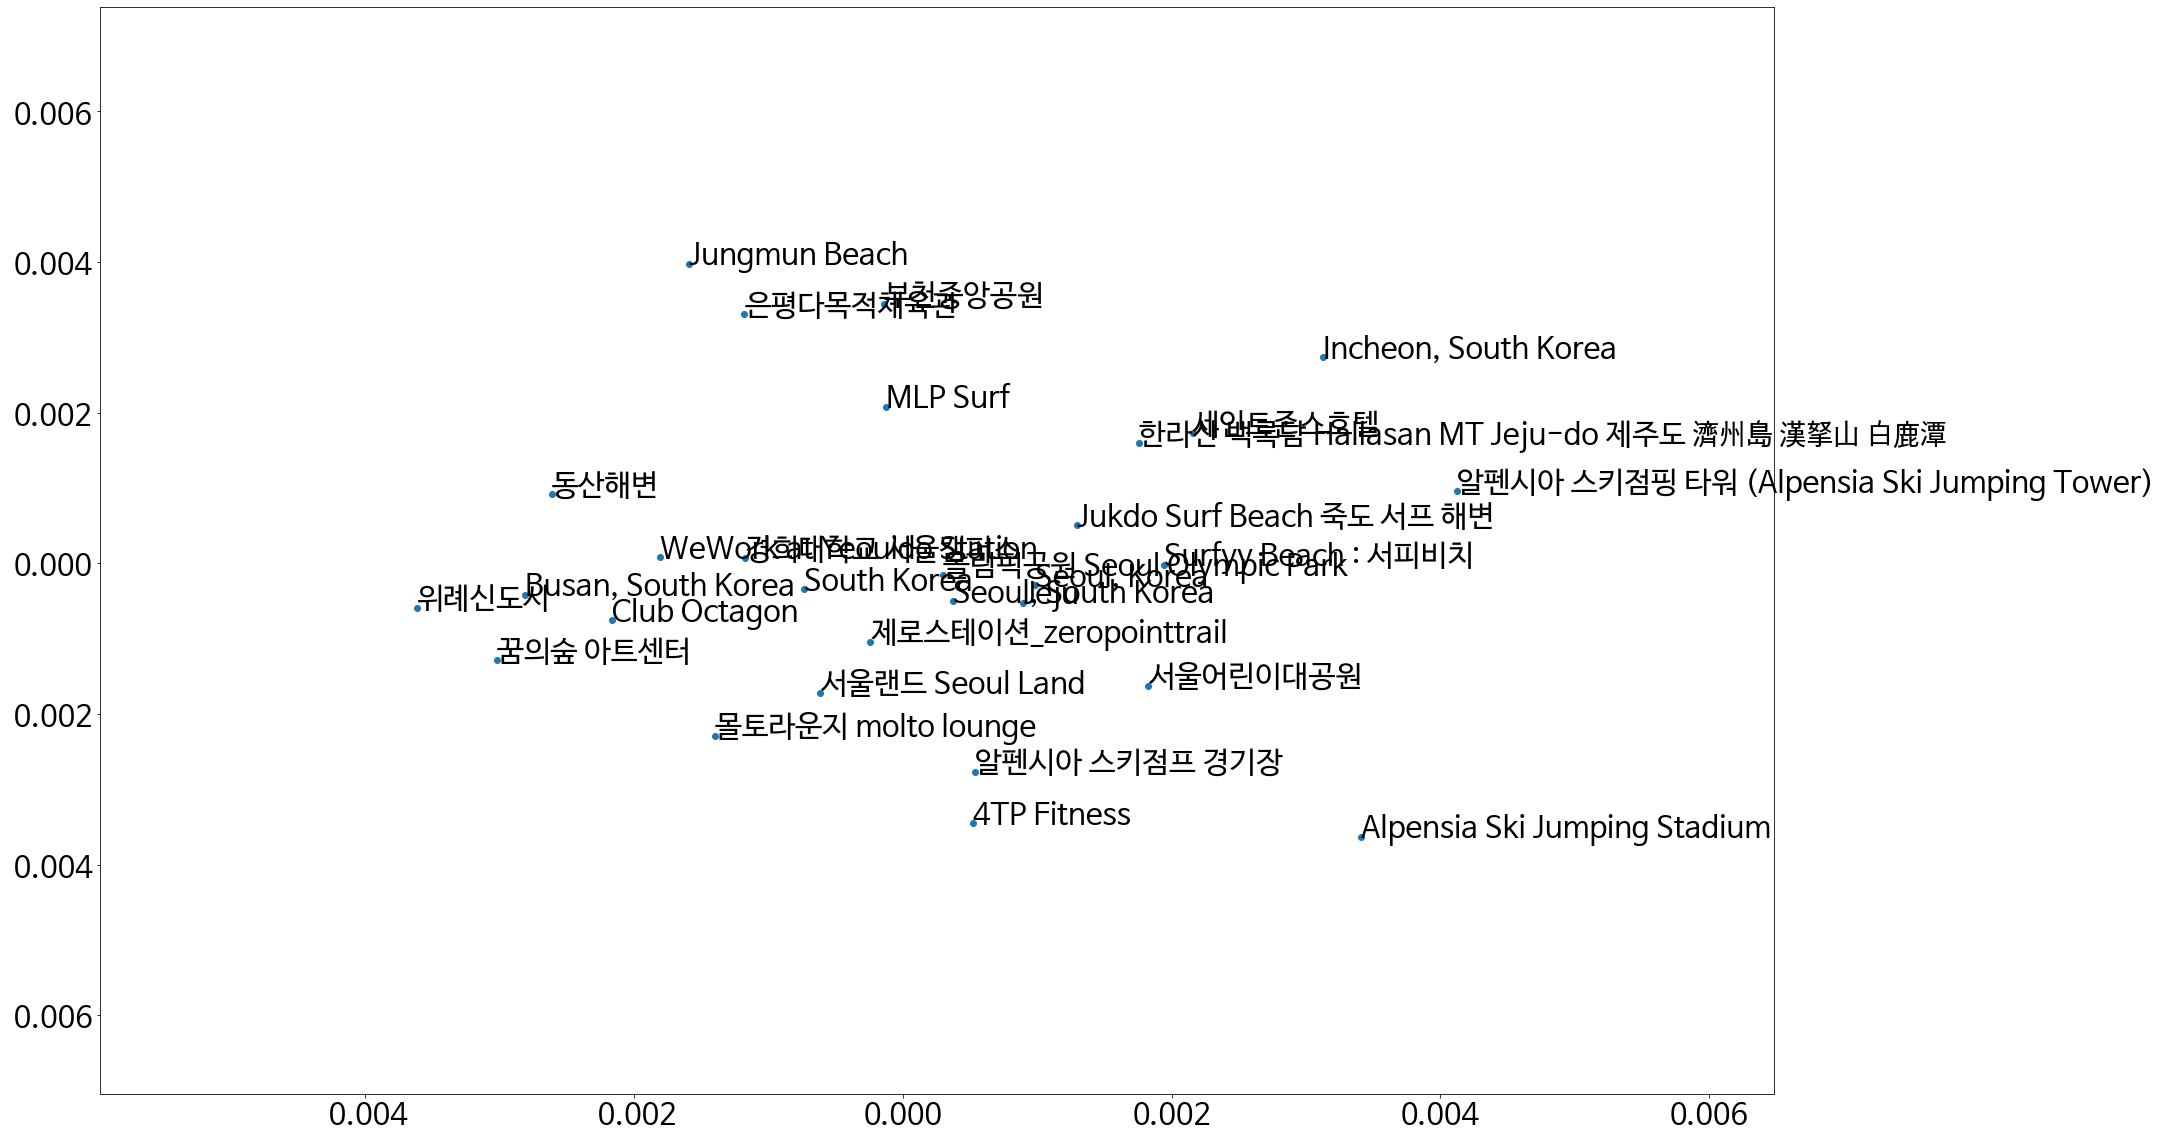

In [83]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))